# Homework 2: Contest

**Author:** Franklin Oliveira

------

On this homework, we're supposed to predict how high schools will perform in the Brazilian national
exam ENEM. To perform this task, it was given to us some datasets containing information about schools located in the state of [São Paulo](https://pt.wikipedia.org/wiki/S%C3%A3o_Paulo_(estado)). 

The variable of interest (to be predicted) is the <span style='color:#ff8000'>**performance of the students in the ENEM exam in 2015**</span>. 

Further details can be found at this [file](Contest%20Description.pdf).

We'll mainly focus on the [ENEM2015.csv](Data/ENEM2015.csv) file as it contains the classification of the high schools in the ENEM exam. We'll also look for explainable features on the other datasets to associate with each school in order to build a good predictive model.

------

**As common, we'll begin with some imports...**

In [197]:
%matplotlib inline

import pathlib
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

**Now, let's define paths...**

In [198]:
# path to datasets
datapath = pathlib.Path('Data')

# path to outputs generated in this notebook
outpath = pathlib.Path('Output')

## Importing datasets

Now, we're ready to take a look into some datasets. Let's begin with <span style='color:blue'>ENEM2015.csv</span>


### ENEM 2015

First, we'll import this dataset and do some exploratory analysis.

In [199]:
enem2015 = pd.read_csv('Data/ENEM2015.csv', sep=',', encoding='latin-1')

enem2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 3 columns):
CODIGO DA ENTIDADE         1243 non-null int64
NUMERO DE PARTICIPANTES    1243 non-null int64
Classificacao              1243 non-null int64
dtypes: int64(3)
memory usage: 29.2 KB


<br>

As we can see, in this dataset we have **1243 non-null observations**. A brief description on each column is presented below.

> - `CODIGO DA ENTIDADE` (8 digit *int*): entity (school) ID number on [INEP](https://enem.inep.gov.br/)
> - `NUMERO DE PARTICIPANTES` (*int*): number of students that took the ENEM exam in 2015 from that school 
> - `Classificacao` (*int number from 0 to 4*): classification of that school based on its students performance (4 = good performance, 0 = poor performance). **This is our variable of interest**.

------

Let's go a bit further and visualize some descriptive informations. 

<br>

**How many different schools are there in our dataset?**

In [200]:
print('# of schools:', len(enem2015['CODIGO DA ENTIDADE'].unique()))

# of schools: 1243


<br>

**How is the distribution of the number of participants?**

In the histogram below we can see that the majority of schools have had less than 100 participants.

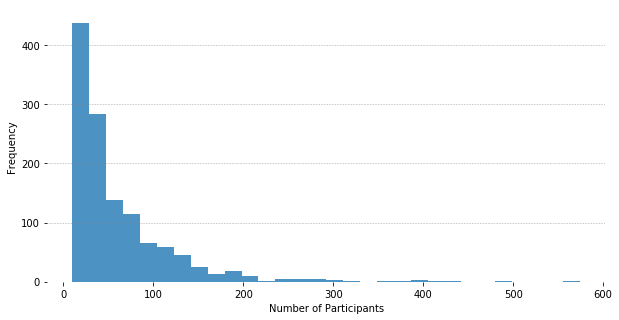

In [201]:
ax = enem2015['NUMERO DE PARTICIPANTES'].plot(kind='hist', bins=30, figsize=(10,5), alpha=0.8)

plt.xlabel('Number of Participants')
# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# adding horizontal grid lines
ax.yaxis.grid(zorder=0, which="major", color='gray', linestyle=':', linewidth=0.6)

<br>

**How many schools got a certain classification (0-4)?**

# of schools per classification group
               0    1    2    3   4
Classificacao  2  193  865  126  57


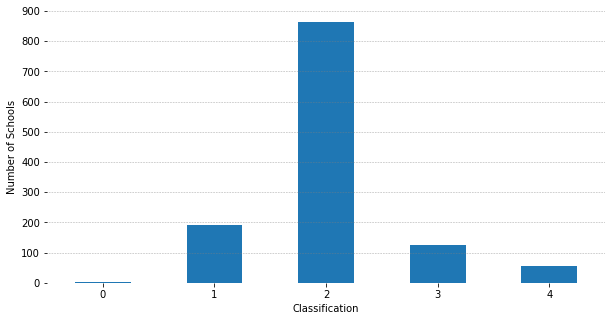

In [202]:
df_to_plot = enem2015.groupby('Classificacao').count()['CODIGO DA ENTIDADE']

print('# of schools per classification group')
print(pd.DataFrame(enem2015['Classificacao'].value_counts()).sort_index().transpose())

ax = df_to_plot.plot(kind='bar', color='tab:blue', figsize=(10,5))

### Adjusting aesthetics
# labels
plt.ylabel('Number of Schools')
plt.xlabel('Classification')

# y axis range
plt.ylim((0,900))

# x axis ticks orientation
plt.xticks(rotation=0)

# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# adding horizontal grid lines
ax.yaxis.grid(zorder=0, which="major", color='gray', linestyle=':', linewidth=0.6)

<br>

**Did the number of participants somehow influence the school classification for the year of 2015?**

Let's try to answer this question in the following chart.

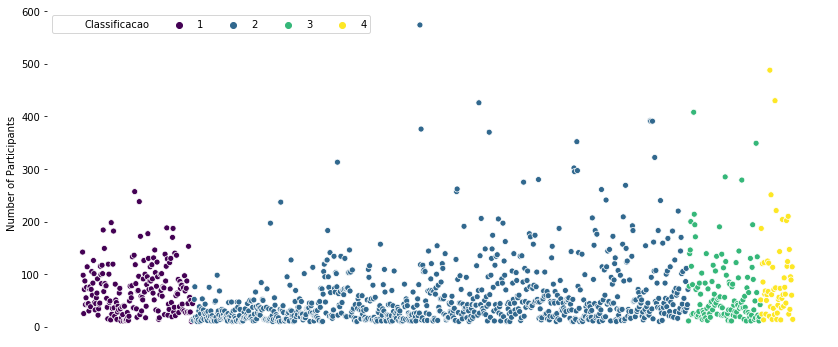

In [203]:
plt.figure(figsize=(14,6))

# excluding 2 observations with classification = 0
df_to_plot = enem2015[enem2015['Classificacao'] != 0]

ax = sns.scatterplot(x=range(len(df_to_plot)), y='NUMERO DE PARTICIPANTES', 
                     data=df_to_plot.sort_values('Classificacao'), hue='Classificacao',
                     palette='viridis')

# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# labels
ax.set(xticklabels=[], xticks=[], ylabel='Number of Participants')

# legend location
plt.legend(loc='upper left', ncol=5)

In the chart above we see that there's no apparent difference in the number of participants among schools with different classifications. However, this graph is not so informative and we should be careful when taking conclusions from it.  

The only information we can take from this graph is that schools with different performance classification didn't have that much difference in the number of participants. 

We might tend to think that schools with <span style='color:blue'>classification = 2</span> have had a higher number of participants on the 2015 ENEM edition, but we should be careful with that thought because the majority of schools in our dataset got that exact classification number. 

------

In the next chart, we see that the distribution of the `NUMERO DE PARTICIPANTES` feature is almost the same in every classification group (with some minnor differences, but they're all assymetric with bigger mass on the interval [0,100]). 

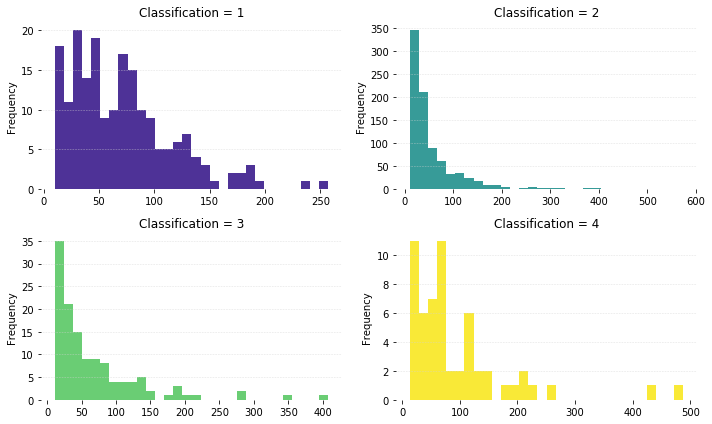

In [204]:
fig, axis = plt.subplots(nrows=2,ncols=2, figsize=(10,6))

colors = ['#3B1C8C', '#21908D', '#5AC865', '#F9E721']
classif=1  # classification number
for i in range(2):
    for j in range(2):
        enem2015[enem2015['Classificacao']==classif]['NUMERO DE PARTICIPANTES'].plot(kind='hist', 
                                                                    bins=30, alpha=0.9, ax=axis[i,j],
                                                                    color = colors[classif-1])
        axis[i,j].set_title('Classification = {}'.format(classif))
        
        # removing frames
        axis[i,j].spines['top'].set_visible(False)
        axis[i,j].spines['right'].set_visible(False)
        axis[i,j].spines['bottom'].set_visible(False)
        axis[i,j].spines['left'].set_visible(False)
        
        # adding horizontal grid lines
        axis[i,j].yaxis.grid(zorder=0, which="major", color='lightgray', linestyle=':', linewidth=0.6)
        
        classif += 1
        

plt.tight_layout()

### Dados Escolares (1996 - 2015)

This dataset contains registration information of São Paulo high schools from 1996 to 2015. As it contains a large number of columns (249), I'll not present each column description here, but it can be found on the file [DadosEscolares1996-2015-dicionario.xlsx](Data/DadosEscolares1996-2015-dicionario.xlsx)

In [205]:
dadosEsc = pd.read_csv('Data/DadosEscolares1996-2015.csv', sep=',', encoding='latin-1', low_memory=False)

dadosEsc.rename(columns={'DISTRITO07':'DISTRITO'}, inplace=True) # rename column to correct misspelling
dadosEsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104292 entries, 0 to 104291
Columns: 249 entries, CODMEC to TOTAL_ALUNOS
dtypes: float64(230), int64(3), object(16)
memory usage: 198.1+ MB


As we want to predict high schools performance on the 2015 ENEM edition, let's start investigating for how many of these schools we're able to recover some registration info from this new dataset.

In [206]:
# Number of schools with performance evaluated on 2015
schools2015 = set(enem2015['CODIGO DA ENTIDADE'])

print('# of schools in enem2015:', len(schools2015))

# of schools in enem2015: 1243


In [207]:
print('# of schools in Dados Escolares (2015):', len(dadosEsc['CODMEC'].unique()))

# of schools in Dados Escolares (2015): 9642


In [208]:
# Number of schools in both datasets
print('# of schools in both datasets:',len(schools2015.intersection(set(dadosEsc['CODMEC']))))

# of schools in both datasets: 693


<span style='color:red'>**OBS:** </span> As we only have school's performance evaluation for the year of 2015, we'll use only historical data on this year to compose a complete dataset for our model. 

In [209]:
# filtering for year 2015 - Dados Escolares database
dadosEsc2015 = dadosEsc[dadosEsc['ANO'] == 2015].copy()

<br>

### Selecting features

Let's begin with investigating how many missing values are there in each column and eliminating the ones with few non-null values.

#### Dealing with missing data

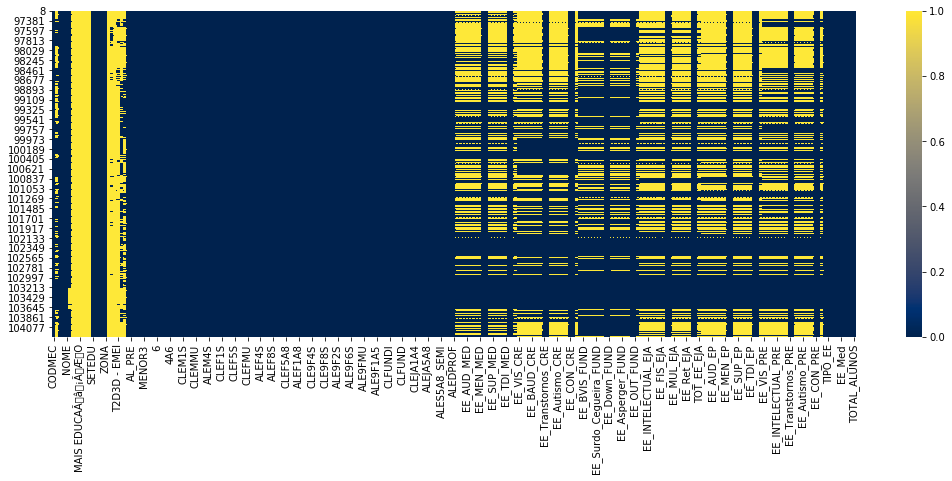

In [210]:
# missing values by row / column
plt.figure(figsize=(18,6))
sns.heatmap(dadosEsc2015.isna(), cmap='cividis')

In the above heatmap, we are able to see every yellow entry as a missing value in Dados Escolares dataset. We can see that there are some columns poorly filled. These don't add much information to our analysis and, as a first step of our feature selection procedure, we'll remove variables with too many missing data. 

Notwithstanding, to define a threshold which we can use to decide whether to delete or not a variable, we must look at exactly how many values are missing in each column. 

In [211]:
# missing values per column
temp = pd.DataFrame(dadosEsc2015.isna().sum(), columns=['missing']).sort_values('missing',ascending=False)
temp['% total'] = round(temp['missing'] / dadosEsc2015.shape[0],2)*100
temp[temp['% total'] != 0.0].head()

,missing,% total
MAIS EDUCAÃâ¡ÃÆO,7127,100.0
Qtde_Docentes,7127,100.0
DTURNOS-EMEI,7127,100.0
MERENDA,7127,100.0
NUM_FUNC,7127,100.0


Let's define a threshold of 20% of missing data, i.e., we'll remove any column that has less than 80% of non-empty values.

In [212]:
print('# of features to delete:', temp[temp['% total'] > 50.0].shape[0])

# of features to delete: 26


In [213]:
features2del = list(temp[temp['% total'] > 50.0].index)

# dropping columns inplace
dadosEsc2015.drop(features2del, axis=1, inplace=True)

**Sanity check:**

Now our dataset looks pretty clear, with only a few info missing only on registration info about school's location and its kind (private, public, etc)

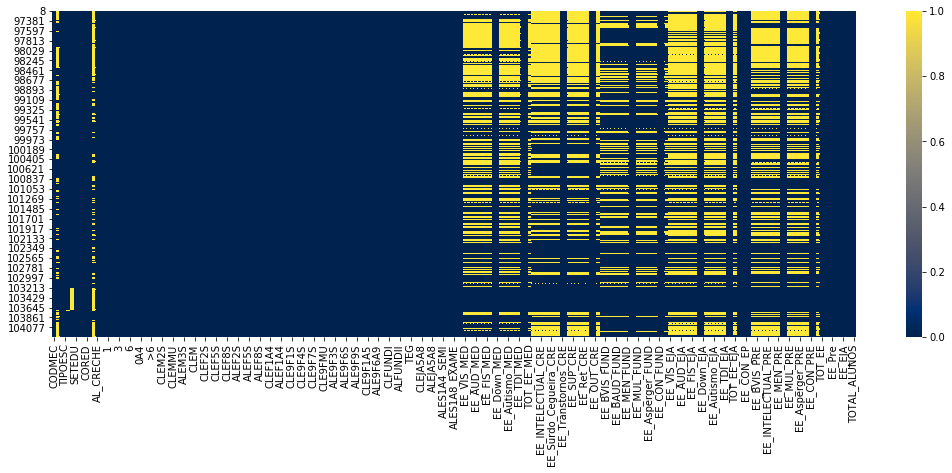

In [214]:
# missing values by row / column
plt.figure(figsize=(18,6))
sns.heatmap(dadosEsc2015.isna(), cmap='cividis')

Now that we cleared Dados Escolares dataset a little, let's take a look into correlation between variables and, with some luck, algo identificate some constant variables along our dataset (if a variable is only a constant in every observation, it doesn't bring any new information for the model to learn from).

-----
#### Analyzing correlation matrix

In the correlation heatmap below, we're able to easily identify contant variables and, subsequently, remove them from the dataset to be used in the learning process.

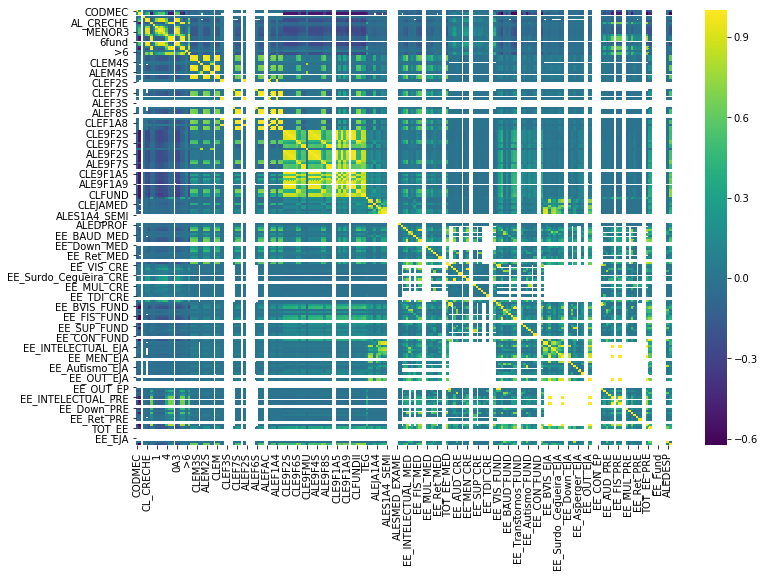

In [215]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(dadosEsc2015.corr(), cmap='viridis')

In [216]:
# removing constant columns
dadosEsc2015 = dadosEsc2015.loc[:, (dadosEsc2015 != dadosEsc2015.iloc[0]).any()] 

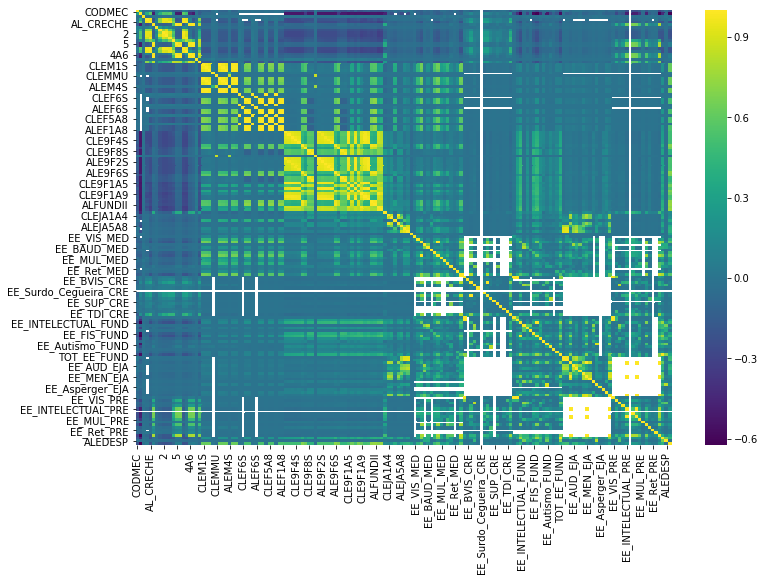

In [217]:
plt.figure(figsize=(12,8))
sns.heatmap(dadosEsc2015.corr(), cmap='viridis')

In [219]:
for col in dadosEsc2015.columns:
    print('-', col)

- CODMEC
- CODEOL
- TIPOESC
- NOME
- DEP
- SETEDU
- DISTRITO
- SUBPREF
- CORED
- ZONA
- CL_CRECHE
- AL_CRECHE
- AL_PRE
- 0
- 1
- 2
- MENOR3
- 3
- 4
- 5
- 6
- 0A3
- 0A4
- 4A6
- 5A6
- >6
- TotalEdInf
- CLEM1S
- CLEM2S
- CLEM3S
- CLEM4S
- CLEMMU
- ALEM1S
- ALEM2S
- ALEM3S
- ALEM4S
- CLEM
- ALEM
- CLEF1S
- CLEF6S
- CLEF7S
- CLEF8S
- ALEF1S
- ALEF6S
- ALEF7S
- ALEF8S
- CLEF1A4
- CLEF5A8
- CLEF1A8
- ALEF1A4
- ALEF5A8
- ALEF1A8
- CLE9F1S
- CLE9F2S
- CLE9F3S
- CLE9F4S
- CLE9F5S
- CLE9F6S
- CLE9F7S
- CLE9F8S
- CLE9F9S
- CLE9FMU
- ALE9F1S
- ALE9F2S
- ALE9F3S
- ALE9F4S
- ALE9F5S
- ALE9F6S
- ALE9F7S
- ALE9F8S
- ALE9F9S
- CLE9F1A5
- CLE9F6A9
- ALE9F1A5
- ALE9F6A9
- CLE9F1A9
- CLFUNDI
- ALFUNDI
- CLFUNDII
- ALFUNDII
- CLFUND
- ALFUND
- TEG
- CLEJA1A4
- CLEJA5A8
- CLEJAMED
- ALEJA1A4
- ALEJA5A8
- ALEJAMED
- TOTALEJA
- ALEDPROF
- EE_VIS_MED
- EE_BVIS_MED
- EE_INTELECTUAL_MED
- EE_AUD_MED
- EE_BAUD_MED
- EE_Surdo_Cegueira_MED
- EE_FIS_MED
- EE_MEN_MED
- EE_MUL_MED
- EE_SUP_MED
- EE_Autismo_MED
- EE_Asp

#### Manually selecting features

As the last correlation heatmap indicates, there are groups of variables strongly correlated with each other. This happens because many of them have a close definition, i.e., pratically mean the same thing. 

So, in this step, we'll check the dictionary for this dataset ([DadosEscolares1996-2015-dicionario.xlsx](Data/DadosEscolares1996-2015-dicionario.xlsx)) and manually select features being careful not to choose any strongly correlated pair.

-----

After a careful inspection, these were the selected features (from the variables remaining after the previous steps):

> **Registration Info:** `TIPOESC`; `NOME`; `SETEDU`; `DISTRITO`; `ZONA` <br>
> **Other:** `CLEM`; `ALEM`; `ALEDESP`; `TOTAL_ALUNOS`

In [220]:
df_dadosEsc = dadosEsc2015[['CODMEC', 'TIPOESC', 'NOME', 'SETEDU', 'DISTRITO', 'ZONA',
                            'CLEM', 'ALEM', 'ALEDESP', 'TOTAL_ALUNOS']]

df_dadosEsc.head()

,CODMEC,TIPOESC,NOME,SETEDU,DISTRITO,ZONA,CLEM,ALEM,ALEDESP,TOTAL_ALUNOS
8,35036961,EE,MOZART TAVARES DE LIMA PROFESSOR,7508.0,SAO RAFAEL,LESTE,14.0,515.0,0.0,1550
9,35036973,EE,BRANCA CASTRO CANTO E MELO PROFESSORA,7202.0,SAO LUCAS,LESTE,11.0,364.0,0.0,488
10,35036985,EE,OSWALDO GUERNER GONZALEZ PROFESSOR,9302.0,VILA PRUDENTE,LESTE,0.0,0.0,0.0,335
11,35037060,EE,ROCCA DORDALL,3101.0,GUAIANASES,LESTE,9.0,302.0,0.0,1214
12,35036959,EE,MANUEL BANDEIRA,6101.0,PERUS,NORTE,33.0,1162.0,0.0,1633


<br>

### Rendimento Escolar (2000-2015)

In [221]:
rendEsc = pd.read_csv('Data/RendimentoEscolar2000-2015.csv', sep=',', encoding='latin-1', low_memory=False)

rendEsc.rename(columns={'DISTRITO07':'DISTRITO'}, inplace=True) # correcting misspelling
#rendEsc.info()

As we did with the previous historical dataset, let's begin asking how many schools that have had its performance evaluated in 2015 can be identified in this new set of data.

In [222]:
print('# of schools in rendEsc:', len(rendEsc['CODMEC'].unique()))

# of schools in rendEsc: 4892


In [223]:
print('# of schools in ENEM2015 and rendEsc datasets:', 
      len(schools2015.intersection(set(rendEsc['CODMEC']))))

# of schools in ENEM2015 and rendEsc datasets: 505


Now, let's also filter our data only for the year of 2015.

In [224]:
rendEsc2015 = rendEsc[rendEsc['ANO'] == 2015].copy()

### Selecting features

To begin with, let's take a look on how many data are missing for each feature. 

#### Dealing with missing data

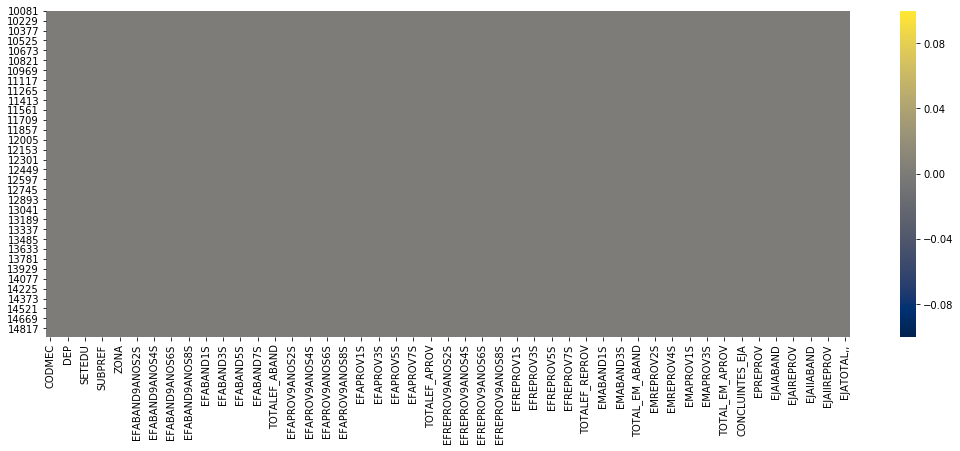

In [225]:
# missing data per row / column
plt.figure(figsize=(18,6))
sns.heatmap(rendEsc2015.isna(), cmap='cividis')

Luckily, there's no non-empty observation on this dataset.

Moving on...


Let's take a look into our numerical variables for this dataset and identify variable groups that are highly correlated. For these groups, we must choose only a subset of these variables as adding higly correlated features into the predictive model might ruin its performance. 

-----
#### Correlation

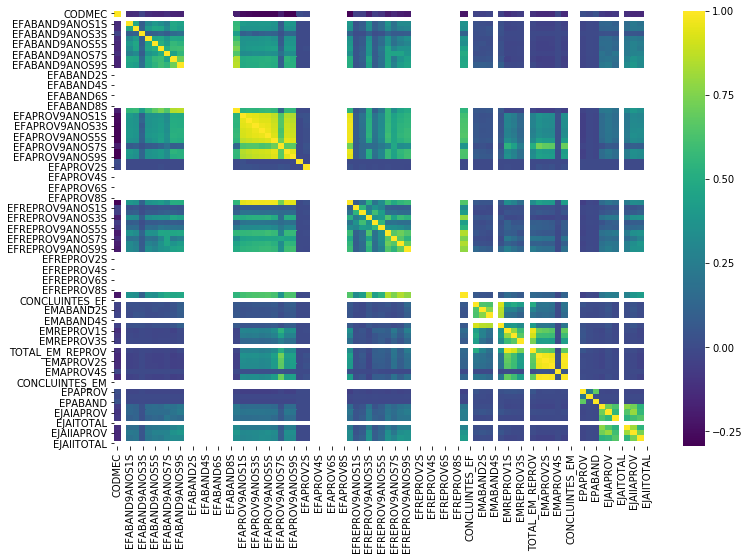

In [226]:
# correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(rendEsc2015.corr(), cmap='viridis')

As we did for the previous dataset, let's remove constant variables (they don't necessarily bring new information to the model)

In [227]:
# removing constant columns
rendEsc2015 =  rendEsc2015.loc[:,rendEsc2015.apply(pd.Series.nunique) != 1]

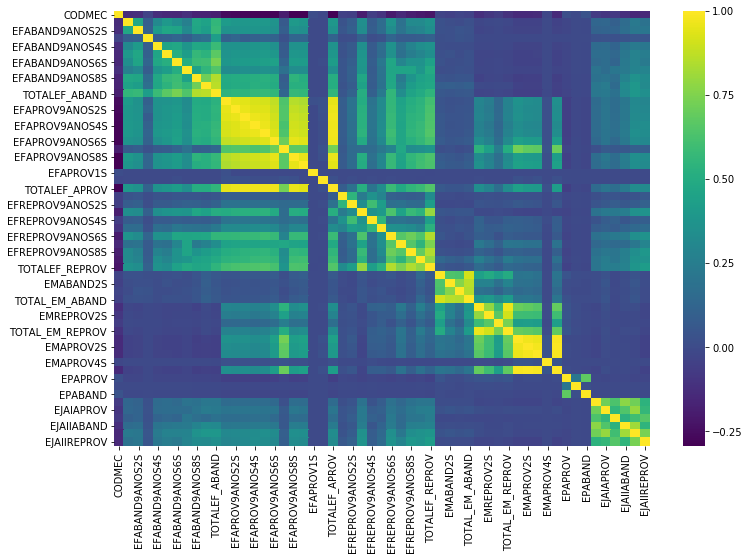

In [228]:
# correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(rendEsc2015.corr(), cmap='viridis')

#### Manually selecting features

Following the same procedure we did on <span style='color:blue'>Dados Escolares 1996-2015</span> dataset, in this step we'll look at the features [dictionary](Data/dicionario-RendimentoEscolar2000-2015.xlsx) and manually select features by its description and being careful not to include any strongly correlated pair.

The selected features were:

> - **Student's dropout during Elementary years:** `TOTALEF_ABAND`; `TOTAL_EM_ABAND`
> - **Student's approval/reproval on Elementary years:** `TOTALEF_APROV`; `TOTALEF_REPROV`
> - **Other:** `EJATOTAL`; `TOTAL_EM_ABAND`


In [229]:
df_rendEsc = rendEsc2015[['CODMEC', 'DEP', 'NOME', 'DISTRITO', 'SUBPREF', 'CORED', 'ZONA', 
                       'TOTALEF_ABAND', 'TOTAL_EM_ABAND', 'TOTALEF_APROV', 'TOTALEF_REPROV',
                       'TOTAL_EM_REPROV', 'TOTAL_EM_APROV', 'EJATOTAL,,']].copy()

<br>

### ESC2013_RMSP_CEM

Let's import the last dataset, apply the same cleaning process we did previously and select some features manually.

In [230]:
esc2013 = pd.read_csv('Data/ESC2013_RMSP_CEM.csv', sep=',', encoding='latin-1', low_memory=False)

esc2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10937 entries, 0 to 10936
Columns: 136 entries, ID to INSE_CL
dtypes: float64(90), int64(36), object(10)
memory usage: 11.3+ MB


In [231]:
print('# of schools in esc2013:', len(esc2013['CODESC'].unique()))

# of schools in esc2013: 10937


In [232]:
print('# of schools in ENEM2015 and esc2013 datasets:', 
      len(schools2015.intersection(set(esc2013['CODESC']))))

# of schools in ENEM2015 and esc2013 datasets: 1243


#### Dealing with missing values

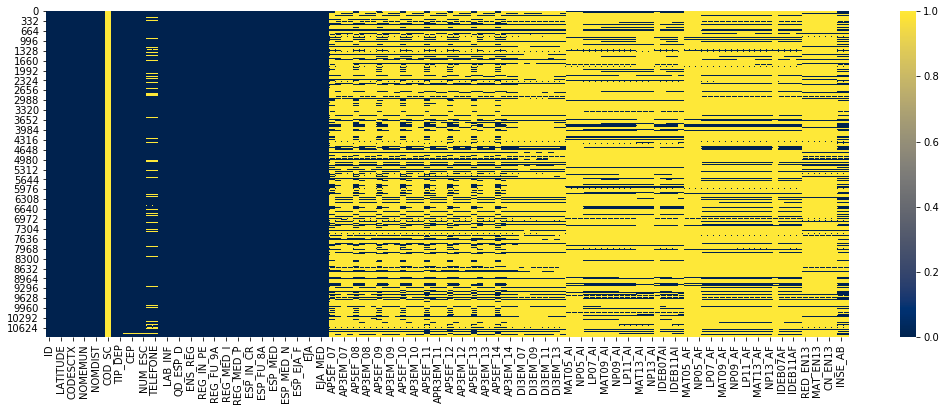

In [233]:
plt.figure(figsize=(18,6))
sns.heatmap(esc2013.isna(), cmap='cividis')

We can easily see that many features were poorly filled in. As we did for the previous dataset, let's remove columns that do have many missing values.

In [234]:
# missing values per column
temp = pd.DataFrame(esc2013.isna().sum(), columns=['missing']).sort_values('missing',ascending=False)
temp['% total'] = round(temp['missing'] / esc2013.shape[0],2)*100
temp[temp['% total'] != 0.0].tail()

,missing,% total
AP5EF_11,6689,61.0
INSE_AB,6404,59.0
INSE_CL,6404,59.0
TELEFONE,1100,10.0
DDD,1100,10.0


Let's define a threshold of 75% of missing data (a little above the other thresholds to allow some more performance variables to remain in the model).

In [242]:
print('# of features to delete:', temp[temp['% total'] > 75.0].shape[0])

# of features to delete: 71


In [243]:
features2del = list(temp[temp['% total'] > 75.0].index)

# dropping columns inplace
df_esc2013 = esc2013.drop(features2del, axis=1, inplace=False).copy()

**Sanity check:**

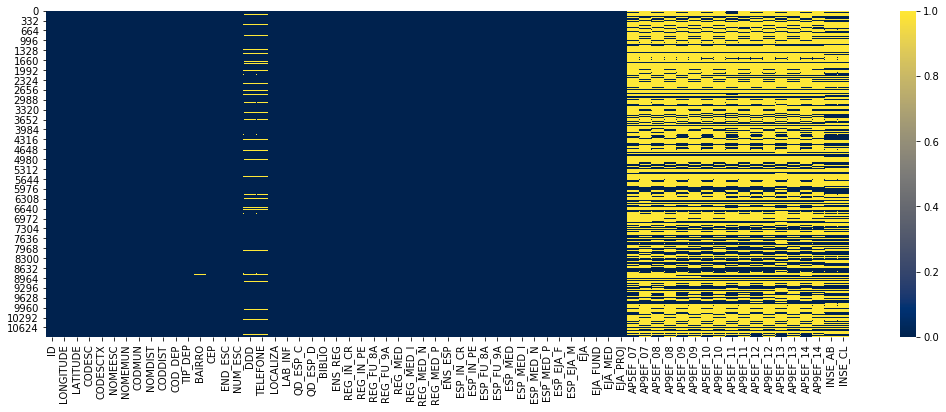

In [244]:
plt.figure(figsize=(18,6))
sns.heatmap(df_esc2013.isna(), cmap='cividis')

Our dataset looks a lot clearer...

-----

#### Correlation

Similar to the other datasets, in the chart below we see that there are some constant variables. So, let's move on removing them. 

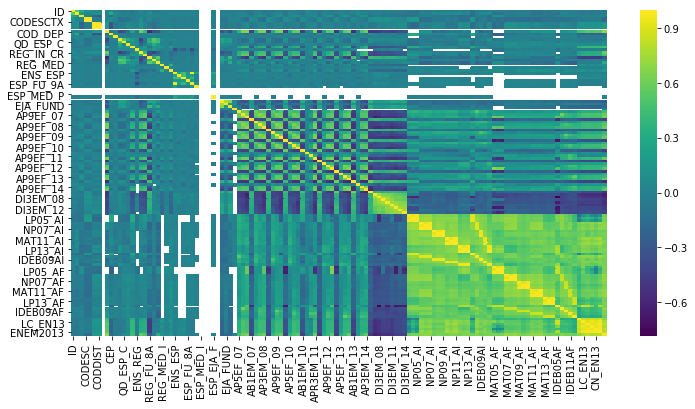

In [245]:
plt.figure(figsize=(12,6))
sns.heatmap(esc2013.corr(), cmap='viridis')

In [246]:
# removing constant columns
df_esc2013 =  esc2013.loc[:,esc2013.apply(pd.Series.nunique) != 1]

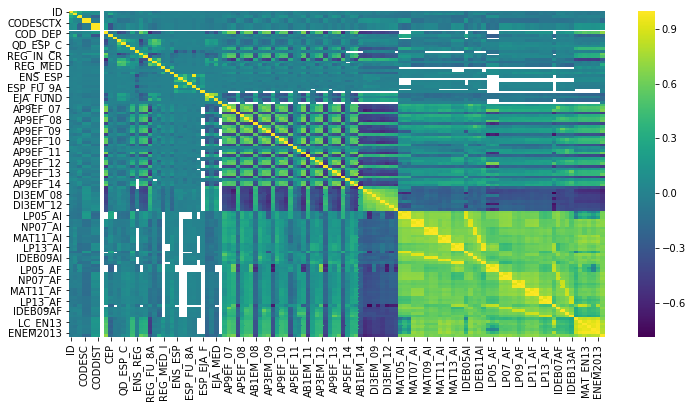

In [247]:
plt.figure(figsize=(12,6))
sns.heatmap(df_esc2013.corr(), cmap='viridis')

finally...

#### Manually selecting features

> `AB1EM_13`; `AB1EM_14`; `AP3EM_14`; `AP3EM_13`; `DI3EM_13`; `DI3EM_14`; `IDEB13AI`; `LP13_AF`; `MAT13_AF`; `RED_EN13`; `LC_EN13`; `MAT_EN13`; `CH_EN13`; `CN_EN13`; `ENEM2013`; `INSE_AB`

In [252]:
df_esc2013 = esc2013[['CODESC','AB1EM_13', 'AB1EM_14', 'AB1EM_14', 'AP3EM_14', 'AP3EM_13', 'DI3EM_13',
                      'DI3EM_14', 'IDEB13AI', 'LP13_AF', 'MAT13_AF', 'RED_EN13', 'LC_EN13',
                      'MAT_EN13', 'CH_EN13', 'CN_EN13', 'ENEM2013', 'INSE_AB']].copy()

### Merging dataframes

In this step, we'll merge the dataframes altogether and create a unique dataframe to feed the model.

#### Rendimento Escolar and Dados Escolares

In [260]:
print('Shape of df_dadosEsc:', df_dadosEsc.shape)
print('Shape of df_rendEsc:', df_rendEsc.shape)

Shape of df_dadosEsc: (7127, 10)
Shape of df_rendEsc: (4863, 14)


In [267]:
# merging the two dataframes
rendDados = pd.merge(df_dadosEsc, df_rendEsc, on='CODMEC', how='outer')

print('Shape of merged dataframe:', rendDados.shape)

Shape of merged dataframe: (7127, 23)


#### ENEM2015 and ESC2013_RMSP_CEM

In [265]:
print('Shape of ENEM2015:', enem2015.shape)
print('Shape of df_esc2013:', df_esc2013.shape)

Shape of ENEM2015: (1243, 3)
Shape of df_esc2013: (10937, 18)


In [271]:
df_esc2013.rename(columns={'CODESC':'CODMEC'}, inplace=True)

In [274]:
enem2015.rename(columns={'CODIGO DA ENTIDADE':'CODMEC'}, inplace=True)

In [277]:
enemEsc = pd.merge(enem2015, df_esc2013, on='CODMEC')

print('Shape of merged dataframe:', enemEsc.shape)

Shape of merged dataframe: (1243, 20)


#### Creating a unique dataset

In [307]:
df_complete = pd.merge(enemEsc, rendDados, on='CODMEC', how='left')

print('Shape of merged dataframe:', df_complete.shape)

Shape of merged dataframe: (1243, 42)


<br>

## Predictive Model

**Imports...**

In [298]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# metrics
from sklearn.metrics import classification_report, roc_curve
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

# predictive model
from sklearn.ensemble import RandomForestClassifier

### First model

Let's run a first model with only the enemEsc dataset to see how relevant are performance variables to predict 2015 school's performance on ENEM.

#### Splitting data

In [408]:
X = enemEsc.drop(['CODMEC','Classificacao'], axis=1).copy()
Y = enemEsc['Classificacao'].copy()

In [409]:
seed = 101
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state= seed)

#### Random Forest Classifier

In [410]:
%%capture --no-stdout

# Setting a pipeline
steps = [('imputation', SimpleImputer(strategy='mean')),
         ('scaler', StandardScaler()),
         ('rfc', RandomForestClassifier())]

pipeline = Pipeline(steps)

# Defining hyperparameter space
param = {'rfc__max_features':[None, 1, 2, 5, 10, "log2", "auto"],
         'rfc__n_estimators':[400],
         'rfc__random_state':[seed]}

# Instantiate GridSearchCV
rforest_cv = GridSearchCV(pipeline,param, cv=5)

# Fitting the model to the train set
rforest_cv.fit(X_train, Y_train)

# Metrics
print("Accuracy:\n {}".format(rforest_cv.best_score_),'\n')
print("Best Parameters:\n {}".format(rforest_cv.best_params_))

Accuracy:
 0.8310344827586207 

Best Parameters:
 {'rfc__max_features': 2, 'rfc__n_estimators': 400, 'rfc__random_state': 101}


#### Fitting a model with the best parameters

In [411]:
%%capture --no-stdout

# transforming X_train
scale = StandardScaler().fit(X_train)
X_train2 = scale.transform(X_train)  # scaling

imputer = SimpleImputer(strategy='mean').fit(X_train2)  # imputting values in NaN
X_train2 = imputer.transform(X_train_scaled)


# transforming X_test
scale = StandardScaler().fit(X_test)
X_test2 = scale.transform(X_test)  # scaling

imputer = SimpleImputer(strategy='mean').fit(X_test2)  # imputting values in NaN
X_test2 = imputer.transform(X_test2)

In [412]:
best_param = rforest_cv.best_params_ 

# instantiating regressor with best params (from GridSearchCV)
rfc = RandomForestClassifier(max_features = best_param['rfc__max_features'], 
                             n_estimators = best_param['rfc__n_estimators'],
                             random_state = best_param['rfc__random_state'])

# fit on train set
rfc.fit(X_train2, Y_train)

# predict on test set
Y_pred = rfc.predict(X_test2)

print('Accuracy on test:', accuracy_score(Y_test,Y_pred))

print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy on test: 0.6327077747989276

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.18      0.06      0.09        64
           2       0.69      0.89      0.78       259
           3       0.10      0.03      0.04        35
           4       0.00      0.00      0.00        14

   micro avg       0.63      0.63      0.63       373
   macro avg       0.19      0.20      0.18       373
weighted avg       0.52      0.63      0.56       373



#### Testing with different seeds

Let's see if our first model results is robust to changes in seed, by fixing the best hyperparameters found in GridSearch.

In [413]:
%%capture --no-stdout

acc = []
seeds = np.linspace(1,350,100, dtype=int)

for seed in seeds:
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state= seed)
    
    # transforming X_train
    scale = StandardScaler().fit(X_train)
    X_train2 = scale.transform(X_train)  # scaling

    imputer = SimpleImputer(strategy='mean').fit(X_train2)  # imputting values in NaN
    X_train2 = imputer.transform(X_train2)


    # transforming X_test
    scale = StandardScaler().fit(X_test)
    X_test2 = scale.transform(X_test)  # scaling

    imputer = SimpleImputer(strategy='mean').fit(X_test2)  # imputting values in NaN
    X_test2 = imputer.transform(X_test2)

    # instantiating regressor with best params (from GridSearchCV)
    rfc = RandomForestClassifier(max_features = best_param['rfc__max_features'], 
                                 n_estimators = best_param['rfc__n_estimators'],
                                 random_state = best_param['rfc__random_state'])
    
    # fit on train set
    rfc.fit(X_train2, Y_train)

    # predict on test set
    Y_pred = rfc.predict(X_test2)

    acc.append(accuracy_score(Y_test, Y_pred))

Text(0.5, 0, 'seed')

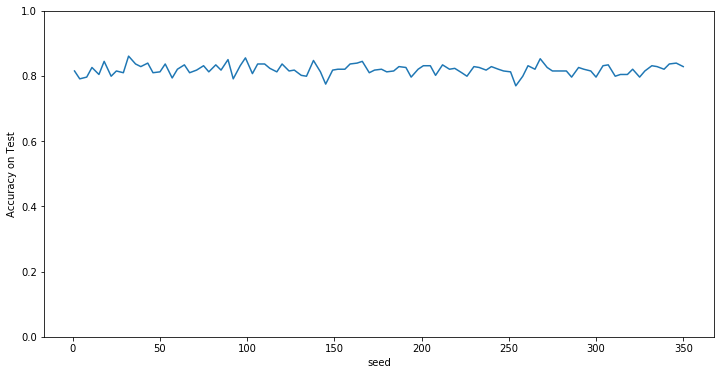

In [414]:
plt.figure(figsize=(12,6))
plt.plot(seeds, acc)

plt.ylim(0,1)

plt.ylabel('Accuracy on Test')
plt.xlabel('seed')

<br>

### Adding more features

Now, let's predict a model with more features (complete dataset)

In [415]:
# checking non-numeric variables
df_complete.dtypes[df_complete.dtypes == 'object']

TIPOESC       object
NOME_x        object
DISTRITO_x    object
ZONA_x        object
DEP           object
NOME_y        object
DISTRITO_y    object
SUBPREF       object
CORED         object
ZONA_y        object
EJATOTAL,,    object
dtype: object

In [416]:
X = df_complete.drop(['CODMEC','Classificacao', 'ZONA_y', 'NOME_y','NOME_x','DISTRITO_x',
                      'DISTRITO_y', 'ZONA_x'], axis=1).copy()
Y = df_complete['Classificacao'].copy()

#### One-hot encoding

In [417]:
cat = list(X.dtypes[X.dtypes == 'object'].index)

In [418]:
X = pd.get_dummies(X, columns=cat, drop_first=True)

#### Train Test Split

In [419]:
seed = 101
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state= seed)

#### Random Forest Classifier (complete dataset)

In [420]:
%%capture --no-stdout

# Setting a pipeline
steps = [('imputation', SimpleImputer(strategy='mean')),
         ('scaler', StandardScaler()),
         ('rfc', RandomForestClassifier())]

pipeline = Pipeline(steps)

# Defining hyperparameter space
param = {'rfc__max_features':[None, 1, 2, 5, 10, "log2", "auto"],
         'rfc__n_estimators':[400],
         'rfc__random_state':[seed]}

# Instantiate GridSearchCV
rforest_cv = GridSearchCV(pipeline,param, cv=5)

# Fitting the model to the train set
rforest_cv.fit(X_train, Y_train)

# Metrics
print("Accuracy:\n {}".format(rforest_cv.best_score_),'\n')
print("Best Parameters:\n {}".format(rforest_cv.best_params_))

Accuracy:
 0.8310344827586207 

Best Parameters:
 {'rfc__max_features': 'auto', 'rfc__n_estimators': 400, 'rfc__random_state': 101}


#### Fitting a model with the best parameters

In [421]:
%%capture --no-stdout

# transforming X_train
scale = StandardScaler().fit(X_train)
X_train2 = scale.transform(X_train)  # scaling

imputer = SimpleImputer(strategy='mean').fit(X_train2)  # imputting values in NaN
X_train2 = imputer.transform(X_train2)


# transforming X_test
scale = StandardScaler().fit(X_test)
X_test2 = scale.transform(X_test)  # scaling

imputer = SimpleImputer(strategy='mean').fit(X_test2)  # imputting values in NaN
X_test2 = imputer.transform(X_test2)

In [422]:
best_param = rforest_cv.best_params_ 

# instantiating regressor with best params (from GridSearchCV)
rfc = RandomForestClassifier(max_features = best_param['rfc__max_features'], 
                             n_estimators = best_param['rfc__n_estimators'],
                             random_state = best_param['rfc__random_state'])

# fit on train set
rfc.fit(X_train2, Y_train)

# predict on test set
Y_pred = rfc.predict(X_test2)

print('Accuracy on test:', accuracy_score(Y_test,Y_pred))

print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy on test: 0.8096514745308311

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.69      0.53      0.60        64
           2       0.85      0.92      0.88       259
           3       0.67      0.51      0.58        35
           4       0.76      0.93      0.84        14

   micro avg       0.81      0.81      0.81       373
   macro avg       0.59      0.58      0.58       373
weighted avg       0.80      0.81      0.80       373



#### Testing with different seeds

In [423]:
%%capture --no-stdout

acc = []
seeds = np.linspace(1,350,100, dtype=int)

for seed in seeds:
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state= seed)
    
    # transforming X_train
    scale = StandardScaler().fit(X_train)
    X_train2 = scale.transform(X_train)  # scaling

    imputer = SimpleImputer(strategy='mean').fit(X_train2)  # imputting values in NaN
    X_train2 = imputer.transform(X_train2)


    # transforming X_test
    scale = StandardScaler().fit(X_test)
    X_test2 = scale.transform(X_test)  # scaling

    imputer = SimpleImputer(strategy='mean').fit(X_test2)  # imputting values in NaN
    X_test2 = imputer.transform(X_test2)

    # instantiating regressor with best params (from GridSearchCV)
    rfc = RandomForestClassifier(max_features = best_param['rfc__max_features'], 
                                 n_estimators = best_param['rfc__n_estimators'],
                                 random_state = best_param['rfc__random_state'])
    
    # fit on train set
    rfc.fit(X_train2, Y_train)

    # predict on test set
    Y_pred = rfc.predict(X_test2)

    acc.append(accuracy_score(Y_test, Y_pred))

Text(0.5, 0, 'seed')

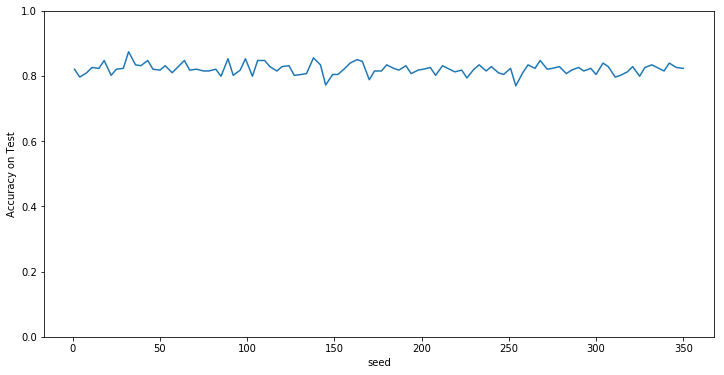

In [424]:
plt.figure(figsize=(12,6))
plt.plot(seeds, acc)

plt.ylim(0,1)

plt.ylabel('Accuracy on Test')
plt.xlabel('seed')

<br>

**This is it!**

That's all I was able to do for this exercise. Hope you enjoyed it!